<a href="https://colab.research.google.com/github/sha-doow/ML/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

# Upload the dataset file from your local machine
uploaded = files.upload()

Saving Titanic.csv to Titanic.csv


In [ ]:
Titanic = pd.read_csv("Titanic.csv")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
!pip install mplcyberpunk
import mplcyberpunk
plt.style.use('cyberpunk')
sns.set()

In [ ]:
import warnings

In [ ]:
def warn(*args,**kwargs):
    pass
warnings.warn=warn

In [ ]:
print(columns)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [ ]:
Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
Titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
Titanic['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [ ]:
Titanic['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [ ]:
Titanic['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [ ]:
Titanic['Fare_Category'] = pd.cut(Titanic['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid','High_Mid','High'])
Titanic['Fare_Category'].value_counts()

Fare_Category
High_Mid    236
Mid         217
Low         208
High        177
Name: count, dtype: int64

In [ ]:

Titanic.rename(columns={"Titanic": "titanic"}, inplace=True)

In [ ]:
pd.crosstab(Titanic['Fare_Category'],Titanic['Survived'])

Survived,0,1
Fare_Category,,
Low,165,43
Mid,150,67
High_Mid,134,102
High,76,101


In [ ]:
Titanic.isna().sum().sort_values(ascending=False)

Cabin            687
Age              177
Fare_Category     53
Embarked           2
PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
SibSp              0
Parch              0
Ticket             0
Fare               0
dtype: int64

In [ ]:

Titanic['Embarked'] = Titanic['Embarked'].fillna('S')
Titanic['Age'].fillna(Titanic['Age'].mean(),inplace=True)

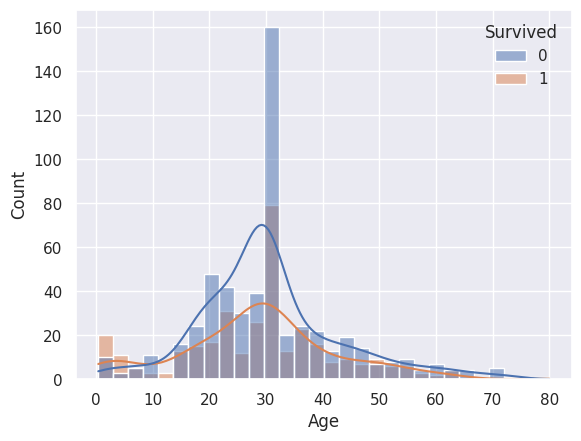

In [ ]:
sns.histplot(x='Age',hue='Survived',data=Titanic,kde=True)
plt.show()

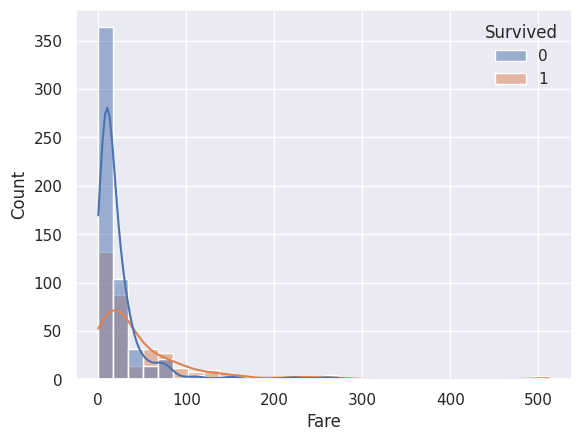

In [ ]:
sns.histplot(x='Fare',hue='Survived',data=Titanic,kde=True,bins=30)
plt.show()

<Figure size 1000x800 with 0 Axes>

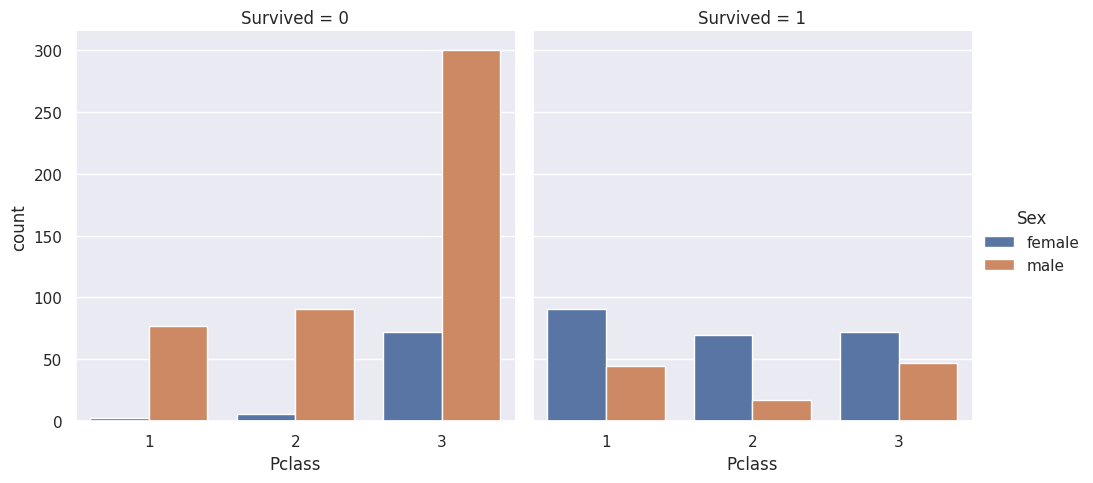

In [ ]:
plt.figure(figsize=(10,8))
sns.catplot(x='Pclass',hue='Sex',col='Survived',kind='count',data=Titanic)
plt.show()

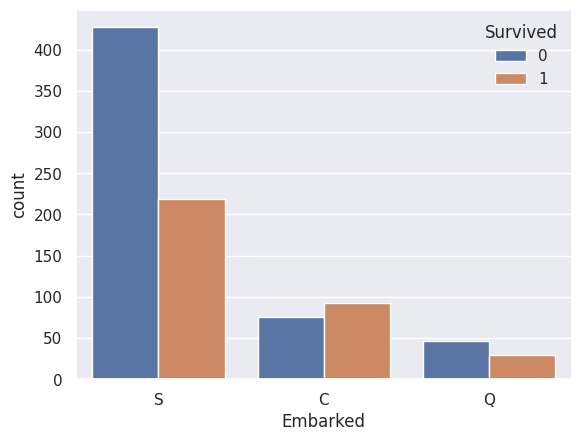

In [ ]:

sns.countplot(x='Embarked',hue='Survived',data=Titanic)
plt.show()

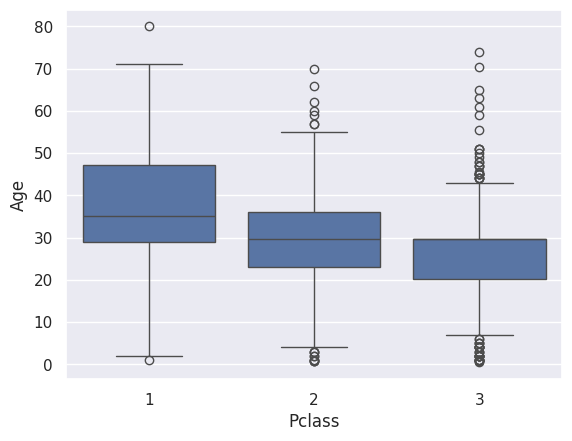

In [ ]:
sns.boxplot(x='Pclass',y='Age',data=Titanic)
plt.show()

In [ ]:
Titanic.dropna(inplace=True)

In [ ]:
Titanic.shape

(171, 13)

In [ ]:
Titanic['Age'] = Titanic.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

Titanic['Age'].fillna(Titanic['Age'].median(), inplace=True)

In [ ]:
Titanic['Age_group']=pd.cut(Titanic['Age'],bins=[0,18,35,50,100],labels=['0-18','19-35','36-50','51+'])

In [ ]:
Titanic['Family_Size']=Titanic['SibSp']+Titanic['Parch']+1


In [ ]:
Titanic.Family_Size.value_counts()

Family_Size
1    82
2    57
3    26
4     6
Name: count, dtype: int64

In [ ]:
Titanic['Fare_range']=pd.qcut(Titanic['Fare'],q=4,labels=['Low','Medium','High','Veryhigh'])

In [ ]:
Titanic['Fare_range']

1          High
3          High
6        Medium
10          Low
11          Low
         ...   
871        High
872         Low
879    Veryhigh
887      Medium
889      Medium
Name: Fare_range, Length: 171, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Veryhigh']

In [ ]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,Age_group,Family_Size,Fare_range
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,High,36-50,2,High
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,High,19-35,2,High
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,High,51+,1,Medium
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,High_Mid,0-18,3,Low
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,High_Mid,51+,1,Low


In [ ]:
columns=Titanic.columns.to_list()
print(columns)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Fare_Category', 'Age_group', 'Family_Size', 'Fare_range']


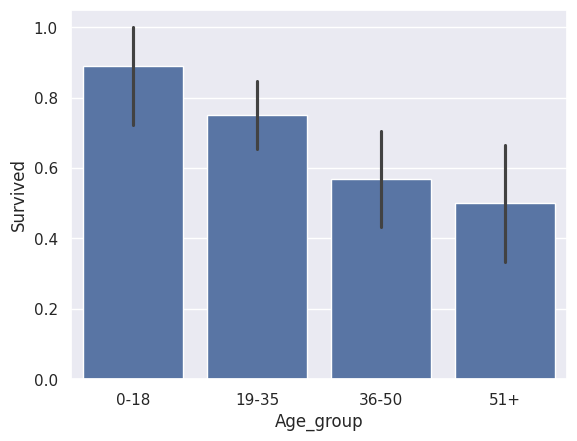

In [ ]:
sns.barplot(x='Age_group',y='Survived',data=Titanic)
plt.show()

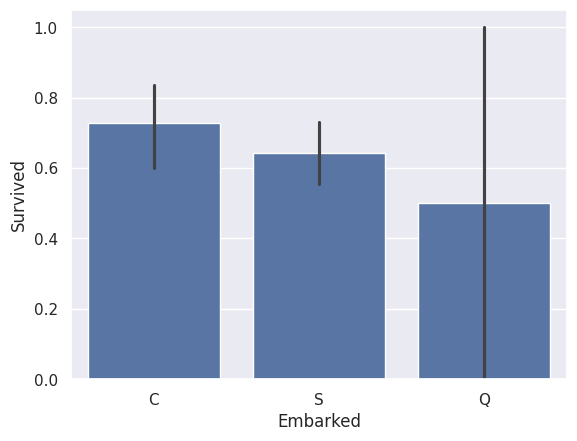

In [ ]:
sns.barplot(x='Embarked',y='Survived',data=Titanic)
plt.show()

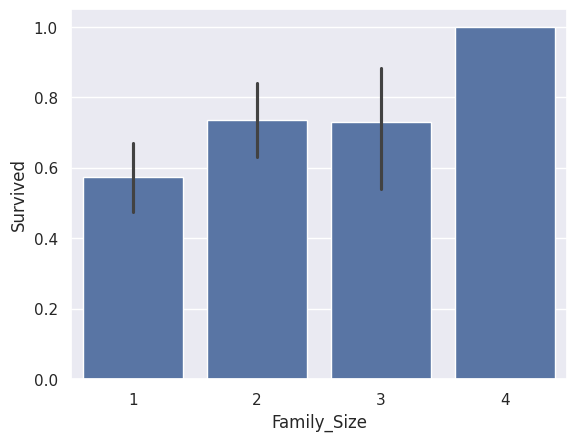

In [ ]:
sns.barplot(x='Family_Size',y='Survived',data=Titanic)
plt.show()

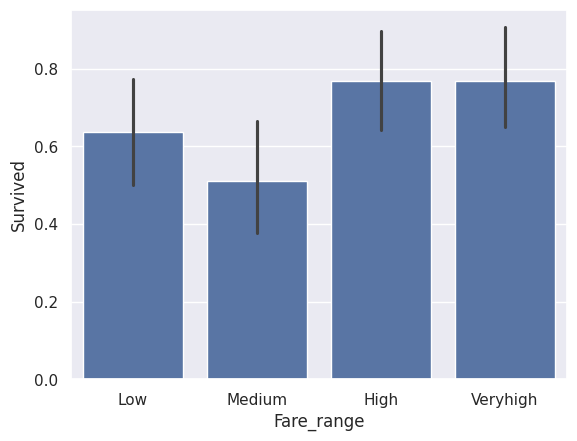

In [ ]:
sns.barplot(x="Fare_range",y="Survived",data=Titanic)
plt.show()

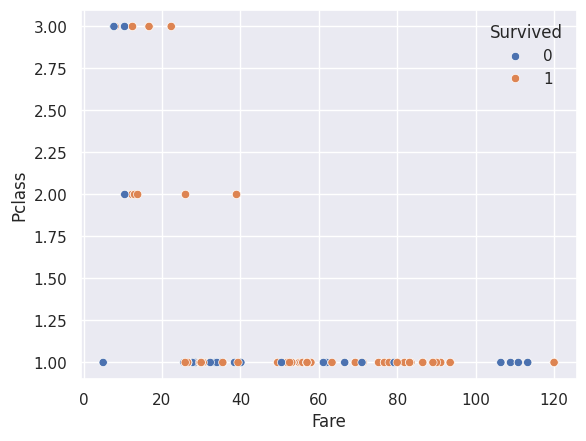

In [ ]:
sns.scatterplot(x='Fare',y='Pclass',hue='Survived',data=Titanic)
plt.show()

In [ ]:
label_encoder = LabelEncoder()

Titanic['Name'] = label_encoder.fit_transform(Titanic['Name'])
Titanic['Ticket'] = label_encoder.fit_transform(Titanic['Ticket'])
Titanic['Sex'] = label_encoder.fit_transform(Titanic['Sex'])
Titanic['Age'] = label_encoder.fit_transform(Titanic['Age'])
Titanic['Fare'] = label_encoder.fit_transform(Titanic['Fare'])
Titanic['Cabin'] = label_encoder.fit_transform(Titanic['Cabin'])
Titanic['Embarked'] = label_encoder.fit_transform(Titanic['Embarked'])
Titanic['Fare_Category'] = label_encoder.fit_transform(Titanic['Fare_Category'])
Titanic['Age_group'] = label_encoder.fit_transform(Titanic['Age_group'])
Titanic['Fare_range'] = label_encoder.fit_transform(Titanic['Fare_range'])



In [ ]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, 1 to 889
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   PassengerId    171 non-null    int64
 1   Survived       171 non-null    int64
 2   Pclass         171 non-null    int64
 3   Name           171 non-null    int64
 4   Sex            171 non-null    int64
 5   Age            171 non-null    int64
 6   SibSp          171 non-null    int64
 7   Parch          171 non-null    int64
 8   Ticket         171 non-null    int64
 9   Fare           171 non-null    int64
 10  Cabin          171 non-null    int64
 11  Embarked       171 non-null    int64
 12  Fare_Category  171 non-null    int64
 13  Age_group      171 non-null    int64
 14  Family_Size    171 non-null    int64
 15  Fare_range     171 non-null    int64
dtypes: int64(16)
memory usage: 22.7 KB


In [ ]:
x = Titanic.drop((['Survived' , 'PassengerId',]) , axis = 1)
y = Titanic['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 ,random_state=42)

In [ ]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((136, 14), (35, 14), (136,), (35,))

In [ ]:
lr = LogisticRegression(random_state=42)
param_grid_lr = {
    'C' : [100,10,1.0,0.1,0.01],
    'penalty':['none']
}

lr_grid_model = GridSearchCV(lr,param_grid=param_grid_lr , scoring='accuracy' , cv= 5)
lr_grid_model.fit(x_train,y_train)
print("Best Parameters: ", lr_grid_model.best_params_)
Best_Logistic_Regression_Model = lr_grid_model.best_estimator_

Best Parameters:  {'C': 100, 'penalty': 'none'}


In [ ]:
print("Accuracy on Training Set: {:.2f}".format(lr_grid_model.best_score_ * 100))

Accuracy on Training Set: 69.84


In [ ]:
LR_Grid_Score = Best_Logistic_Regression_Model.score(x_test, y_test)
print("Accuracy By Best Logistic Regression Model:",LR_Grid_Score*100)

Accuracy By Best Logistic Regression Model: 77.14285714285715


Text(0.5, 1.0, 'Confusion Matrix For Best Logistic Regression')

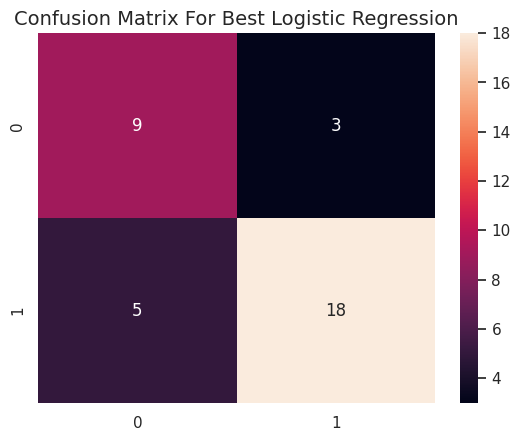

In [ ]:
lr_grid_y_pred = Best_Logistic_Regression_Model.predict(x_test)
conf_matrix = confusion_matrix(y_test, lr_grid_y_pred)
sns.heatmap(conf_matrix, annot=True)
plt.title("Confusion Matrix For Best Logistic Regression", fontsize=14)

In [ ]:
decision_tree_model = DecisionTreeClassifier(max_depth=10 ,criterion='gini',min_samples_split=4,min_samples_leaf=4,max_features=None,random_state=42)
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=4,
                       random_state=42)

In [ ]:

y_train_pred_dt = decision_tree_model.predict(x_train)
accuracy_train_dt = accuracy_score(y_train, y_train_pred_dt)
print("Accuracy on Training Set: {:.2f}".format(accuracy_train_dt* 100))

Accuracy on Training Set: 92.65


In [ ]:
DT_Score = decision_tree_model.score(x_test, y_test)
print("Accuracy By Decision Tree Model:",DT_Score*100)

Accuracy By Decision Tree Model: 77.14285714285715


In [ ]:
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [10, 100,1000],
    'max_depth': [15,20,40,80,90],
    'max_features' :[0.5,1,2,3],
    'min_samples_split': [8, 10,12],
    'min_samples_leaf': [ 5,10,15],
    'criterion' : ['gini', 'entropy'],
    'bootstrap': [True]

}

rf_grid_model = GridSearchCV(rf,param_grid=param_grid_rf , cv= 3,n_jobs=-1,verbose=1)
rf_grid_model.fit(x_train,y_train)
print("Best Parameters: ", rf_grid_model.best_params_)
Best_RandomForest_Model = rf_grid_model.best_estimator_

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits
Best Parameters:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 2, 'min_samples_leaf': 10, 'min_samples_split': 8, 'n_estimators': 10}


In [ ]:
print("Accuracy on Training Set: {:.2f}".format(rf_grid_model.best_score_ * 100))

Accuracy on Training Set: 74.22


In [ ]:
RF_Grid_Score = Best_RandomForest_Model.score(x_test, y_test)
print("Accuracy By Best RandomForest Model:",RF_Grid_Score*100)

Accuracy By Best RandomForest Model: 74.28571428571429


Text(0.5, 1.0, 'Confusion Matrix For Best RandomForest')

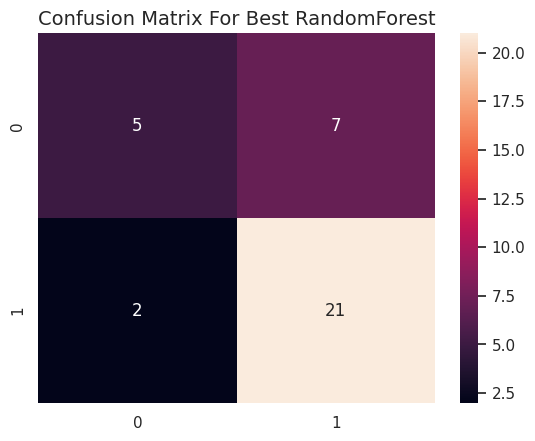

In [ ]:
rf_grid_y_pred = Best_RandomForest_Model.predict(x_test)
conf_matrix = confusion_matrix(y_test, rf_grid_y_pred)
sns.heatmap(conf_matrix, annot=True)
plt.title("Confusion Matrix For Best RandomForest", fontsize=14)

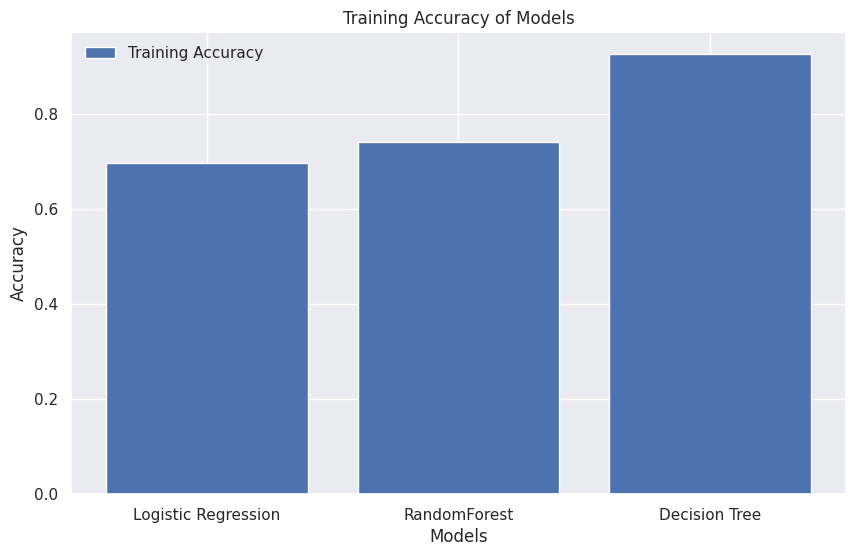

In [ ]:
model_names = ['Logistic Regression', 'RandomForest','Decision Tree']
train_accuracies = [lr_grid_model.best_score_,rf_grid_model.best_score_,accuracy_train_dt]
plt.figure(figsize=(10, 6))
plt.bar(model_names, train_accuracies, label='Training Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training Accuracy of Models')
plt.legend()
plt.show()

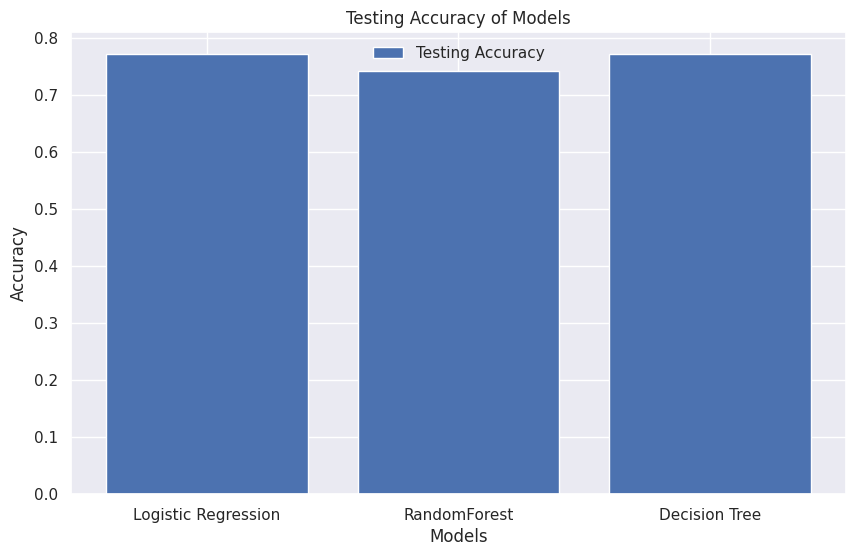

In [ ]:
plt.figure(figsize=(10, 6))
test_accuracies = [LR_Grid_Score, RF_Grid_Score,DT_Score]
plt.bar(model_names, test_accuracies, label='Testing Accuracy')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Testing Accuracy of Models')
plt.legend()

plt.show()
